In [4]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
model = DiscreteBayesianNetwork([
    ('Roll', 'Die'),
    ('Die', 'Urn'),
    ('Urn', 'Red')
])

cpd_roll = TabularCPD(variable = 'Roll', variable_card = 1, values = [[1]])
cpd_die = TabularCPD(variable = 'Die',
                    variable_card = 6,
                    values = [[0.166]] * 6,
                    evidence = ['Roll'],
                    evidence_card = [1]
                    )
cpd_urn = TabularCPD(variable = 'Urn',
                    variable_card = 3, # 3 possible configurations of the urn after rolling the die
                    values = [
                        [0, 0, 0, 0, 0, 1], #if we get a 6 add red
                        [1, 0, 0, 1, 0, 0], # add blue
                        [0, 1, 1, 0, 1, 0]  # if we get a prime add black
                    ],
                    evidence = ['Die'],
                    evidence_card = [6]
                    ) 
cpd_red = TabularCPD(variable = 'Red',
                    variable_card = 2, # yes/no
                    values = [
                        [0.6, 0.7, 0.7],
                        [0.4, 0.3, 0.3]
                    ],
                    evidence = ['Urn'],
                    evidence_card = [3]
                    )




In [14]:
model.add_cpds(cpd_die, cpd_urn, cpd_red, cpd_roll)

model.check_model()

True

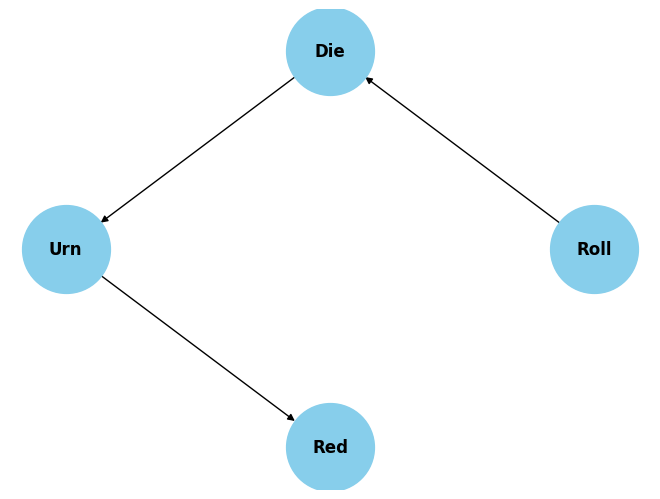

In [15]:
pos = nx.circular_layout(model)
nx.draw(model, pos=pos, with_labels=True, node_size=4000, font_weight='bold', node_color='skyblue')
plt.show()

In [16]:
model.local_independencies(['Die', 'Urn', 'Red', 'Roll'])

(Urn ⟂ Roll | Die)
(Red ⟂ Roll, Die | Urn)

In [19]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(["Red"])
print(f"Red={posterior_p}")

Red=+--------+------------+
| Red    |   phi(Red) |
+========+============+
| Red(0) |     0.6833 |
+--------+------------+
| Red(1) |     0.3167 |
+--------+------------+
